In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 8

In [2]:
df=pd.read_csv("pavagada_nasa_dataset.csv");

In [3]:
df['solar_power'] = df.apply(lambda row: row.ALLSKY_SFC_LW_DWN*1.6*15.6*0.75 , axis = 1) 

In [4]:
df.rename(columns={"DY": "day", "MO": "month", "YEAR": "year"}, inplace=True)

In [5]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])

In [6]:
df.head()

,LAT,LON,year,month,day,PRECTOT,QV2M,RH2M,PS,TS,...,T2M,WS10M,WS50M,WS10M_MAX,WS50M_MAX,WS50M_MIN,WS10M_MIN,ALLSKY_SFC_LW_DWN,solar_power,date
0,14.10001,77.28001,1997,1,1,0.0,0.009282,65.94,95.23,19.52,...,18.59,3.96,6.28,5.76,8.24,3.81,2.49,8.30,155.3760,1997-01-01
1,14.10001,77.28001,1997,1,2,0.0,0.009038,61.90,95.17,20.27,...,19.17,2.91,4.80,4.15,6.25,2.22,2.04,8.04,150.5088,1997-01-02
2,14.10001,77.28001,1997,1,3,0.0,0.009616,61.47,95.04,21.46,...,20.25,2.49,4.27,3.56,6.77,1.29,1.40,8.09,151.4448,1997-01-03
3,14.10001,77.28001,1997,1,4,0.0,0.009687,60.68,95.03,21.85,...,20.58,2.55,3.99,4.63,8.27,1.17,1.30,8.19,153.3168,1997-01-04
4,14.10001,77.28001,1997,1,5,0.0,0.009632,62.05,95.03,21.44,...,20.12,3.99,5.84,5.08,8.61,3.02,2.98,8.15,152.5680,1997-01-05


In [7]:
indexed_df=df[['date', 'solar_power']]

In [8]:
indexed_df.set_index(['date'], inplace=True)

In [9]:
indexed_df.head()

,solar_power
date,
1997-01-01,155.3760
1997-01-02,150.5088
1997-01-03,151.4448
1997-01-04,153.3168
1997-01-05,152.5680


In [10]:
indexed_df.tail()

,solar_power
date,
2020-02-29,168.4800
2020-03-01,170.3520
2020-03-02,172.7856
2020-03-03,178.4016
2020-03-04,175.9680


In [11]:
indexed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8461 entries, 1997-01-01 to 2020-03-04
Data columns (total 1 columns):
solar_power    8461 non-null float64
dtypes: float64(1)
memory usage: 132.2 KB


In [34]:
final_df=np.array_split(indexed_df, 4)

In [35]:
final_df[3]

,solar_power
date,
2014-05-18,191.5056
2014-05-19,194.8752
2014-05-20,198.6192
2014-05-21,191.6928
2014-05-22,192.4416
2014-05-23,188.3232
2014-05-24,192.8160
2014-05-25,194.5008
2014-05-26,195.9984


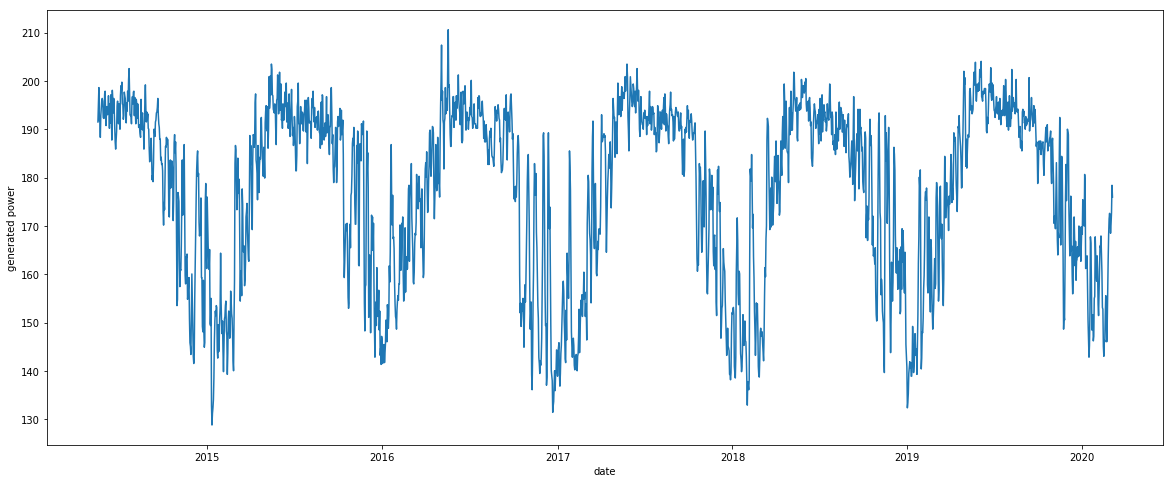

In [36]:
plt.xlabel('date')
plt.ylabel('generated power')
plt.plot(final_df[3])

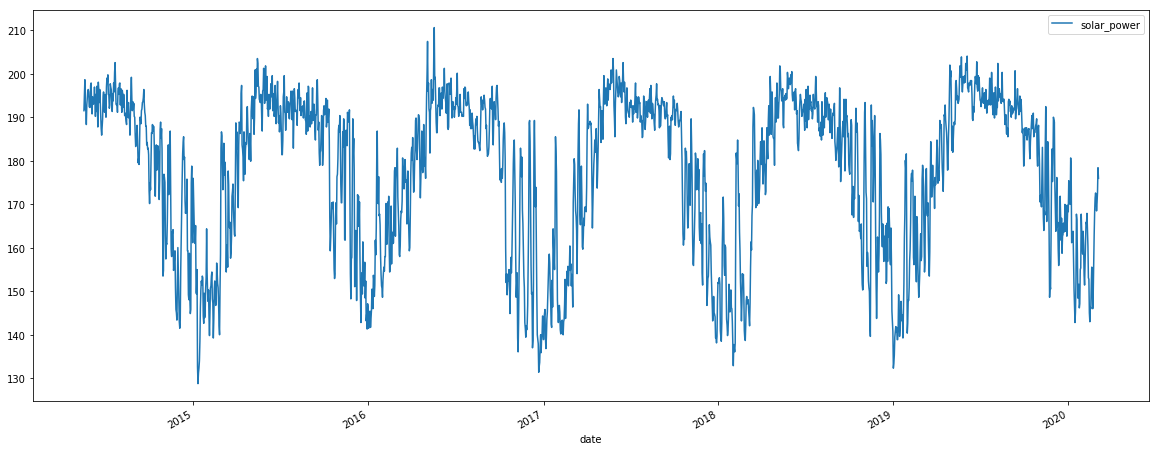

In [37]:
final_df[3].plot()

In [30]:
from statsmodels.tsa.stattools import adfuller

In [38]:
test_result=adfuller(final_df[3]['solar_power'])

In [39]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(solar_power):
    result=adfuller(solar_power)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [40]:
adfuller_test(final_df[3]['solar_power'])

ADF Test Statistic : -3.1047691114154032
p-value : 0.026202260120515252
#Lags Used : 16
Number of Observations Used : 2098
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Model

C:\Users\EE1303227\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


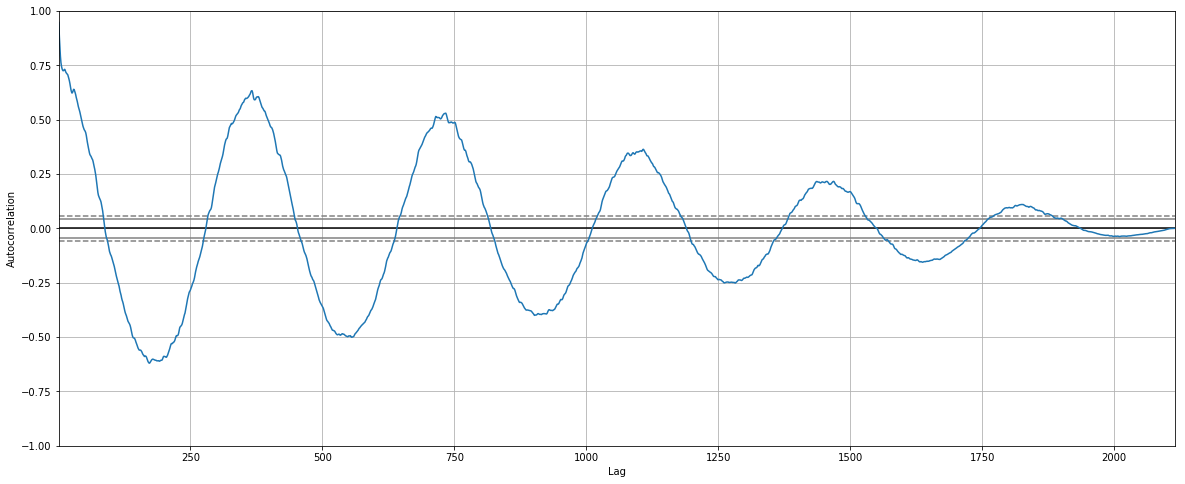

In [41]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(final_df[3]['solar_power'])
plt.show()

## Final Thoughts on Autocorrelation and Partial Autocorrelation
* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.  

* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

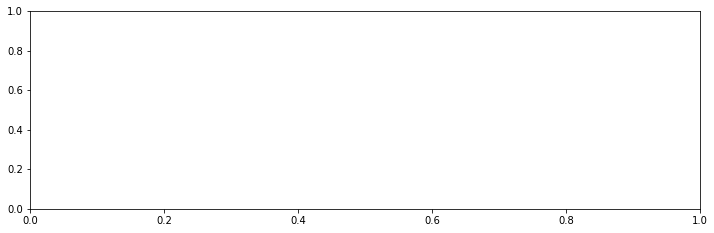

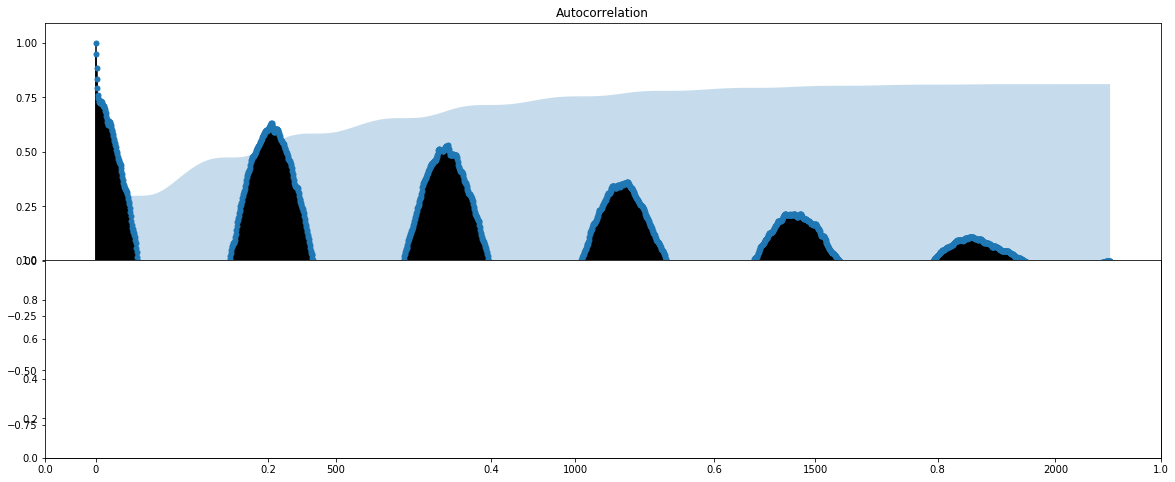

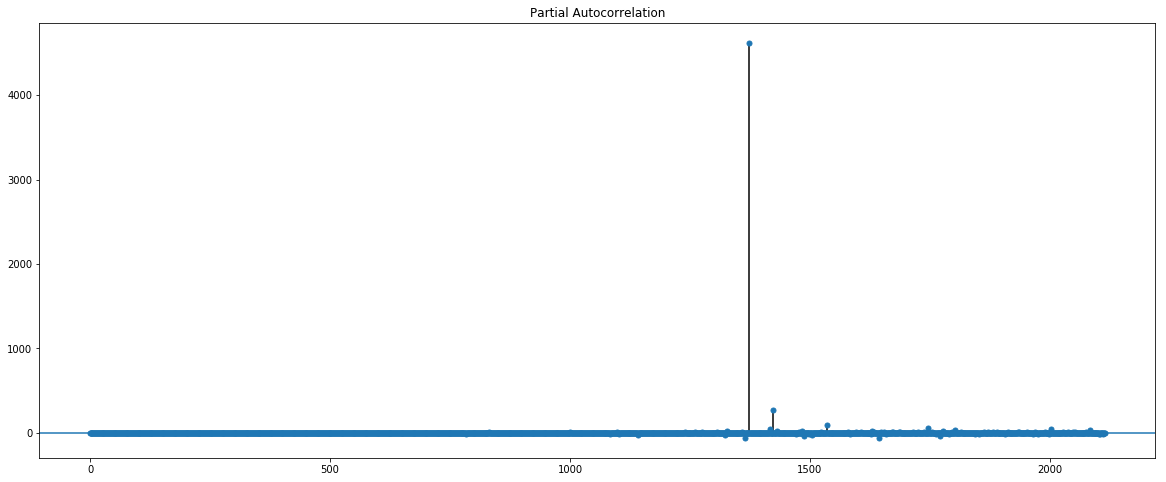

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(final_df[3]['solar_power'])
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(final_df[3]['solar_power'])

In [73]:
 # For non-seasonal data
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

C:\Users\EE1303227\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\EE1303227\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\EE1303227\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


plotting AR model


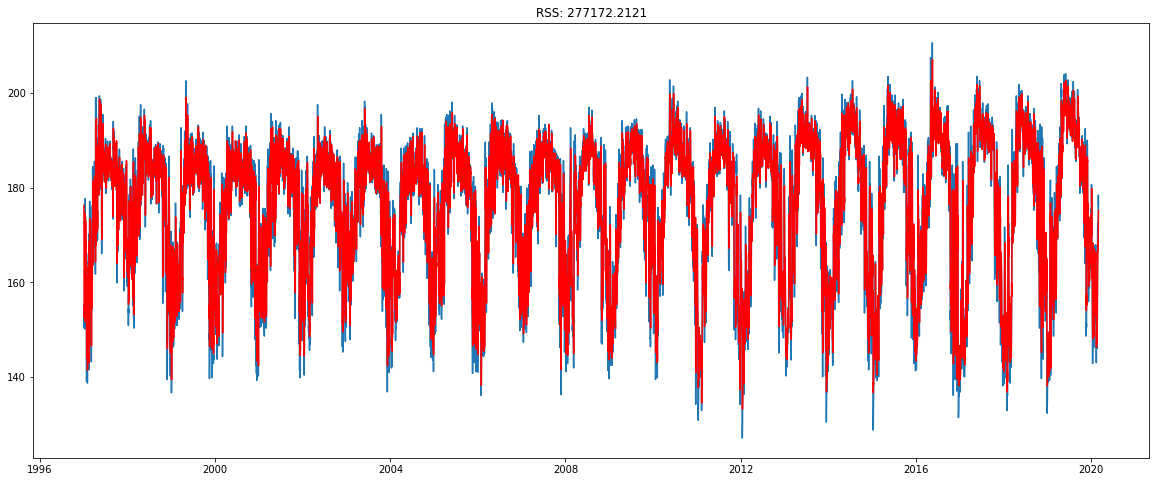

In [88]:
model = ARIMA(indexed_df['solar_power'],order=(10,0,10))
results_AR = model_fit=model.fit(disp=-1)
plt.plot(indexed_df)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-indexed_df['solar_power'])**2))
print("plotting AR model")

In [75]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            solar_power   No. Observations:                 8461
Model:                     ARMA(1, 1)   Log Likelihood              -27014.262
Method:                       css-mle   S.D. of innovations              5.893
Date:                Sun, 28 Jun 2020   AIC                          54036.524
Time:                        18:43:08   BIC                          54064.697
Sample:                             0   HQIC                         54046.141
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               176.3050      0.798    221.048      0.000     174.742     177.868
ar.L1.solar_power     0.9187      0.005    191.862      0.000       0.909       0.928
ma.L1.solar_power     0.0136      0.014      0.984      0.325      -0.013       0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0885           +0.0000j            1.0885            0.0000
MA.1          -73.7215           +0.0000j           73.7215            0.5000
-----------------------------------------------------------------------------
"""